# Gin Rummy Score Analysis

My wife and I played 11 games in rummy the last few days, and I won 9 of them, which had her a little sad. Bad luck or skill? Games are 3-5 rounds, and I have scores for each round. Since rounds are (sort of) independent, we can look at them individually to see if there really is a significant difference in how high we score. 

You'll notice I capture the scores grouped into games even though we mainly care about round scores. This is because by comparing the game totals with the totals on our score sheet, I can catch errors such as typos or addition errors in our scoring. Embarrasingly, there were a few of both!

In [1]:
# The raw data typed in from our score sheet
games = [
    [[40, -75, 40, 155, -55], [40, 35, 60, 125, 45]],
    [[35, 105, 15, 70], [90, 75, 40, 60]],
    [[20, 55, 80, 105, 35], [90, 70, 60, 50, 35]],
    [[45, 35, -40], [150, 105, 35]],
    [[60, 120, 35, 50, 75], [50, 115, 60, 95, 55]],
    [[70, 65, 55, 35, 90], [65, 55, 70, 85, 110]],
    [[35, 65, 95, -55, 65], [105, 30, -10, 50, -25]],
    [[15, 135, 70, 45, 5], [75, 120, 40, 100, 95]],
    [[-20, 60, 55, 50, 55], [45, 65, 5, -50, -20]],
    [[35, 65, -10], [205, 40, 75]],
    [[105, 50, 80, 25, 55], [70, 50, 65, 80, 140]]
]

# Check the totals - parity helps catch errors (eg game 3 20 -> 70, or wrong scores)
sums = [(sum(a), sum(b)) for a, b in games]
print(sums)

[(105, 305), (225, 265), (295, 305), (40, 290), (340, 375), (315, 385), (205, 150), (270, 430), (200, 45), (90, 320), (315, 405)]


The stat that prompted this closer look:

In [4]:
e_wins = [int(sum(g[0]) > sum(g[1])) for g in games]
print(f'Ellie won {sum(e_wins)} out of {len(games)} games - {round(100*sum(e_wins)/len(games), 2)}%')

Ellie won 2 out of 11 games - 18.18%


### Make a picture

We could jump sraight to statistics, but I find it extremely useful to check things visually first. Here, I dump the round scores into a dataframe for convenience and overlap the score distributions:

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# Scores into a dataframe
df = pd.DataFrame({
    'J':np.concatenate([g[1] for g in games]),
    'E':np.concatenate([g[0] for g in games])
})
df.head()

,J,E
0,40,40
1,35,-75
2,60,40
3,125,155
4,45,-55


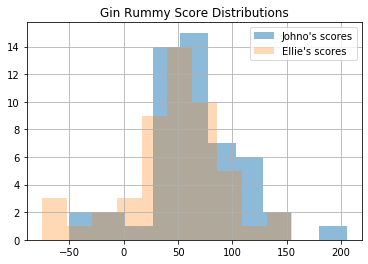

In [7]:
# Plot the distributions 
ax = df['J'].hist(alpha = 0.5, label="Johno's scores") 
df['E'].hist(ax=ax, alpha=0.3, label="Ellie's scores")
plt.title('Gin Rummy Score Distributions')
plt.legend()
plt.savefig('J_vs_E.png')

### Getting Statistical

A <20% win rate seems drastic, but there is so much luck involved in this game. Looking at the distributions, it seems we are actually pretty closely matched! So how can we tell if there is any actual ("significant") difference? This is where the classic stats stuff comes up. 

These are roughly normal distributions (if you squint with a bit of imagination). And we can consider them samples (n=50) from two distributions. The perfect setup for the Two-Sample T-Test, which we can easily do here by copying code from the [scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html):

In [8]:
from scipy import stats
stats.ttest_ind(df['J'].values,df['E'].values) # Optional: equal_var = False (makes ~no difference in this case)

Ttest_indResult(statistic=1.9327320966435646, pvalue=0.05615605644440084)

In [9]:
1/0.056 # A 1-in-18 chance we are equally skilled at gin rummy -> we cannot reject the null hypothesis

17.857142857142858

Like all good statisticians, we've been taught that p=0.05 is how we decide if something is 'significant' - i.e. there is a less-that-1-in-20 chance that the null hypothesis is correct. And here p=0.056 so we can't reject the possibility that we're both equally good at this game. 

Now, if I cared about publishing I would simply play a few more games to up the sample size and hopefully push that p-value below the threshold like any good academic... but in this case I want matrimonial bliss not tenure, so I'll leave this as it is. 

I hope you enjoyed this little Friday-afternoon distraction. Let me know if you try this on your own data :)